# ¡Hola, Yair!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Pronosticos y predicciones

En este proyecto tiene como objetivo analizar los perfiles de los usuarios de una cadena de gimnasios y aportar recomendaciones sobre como reducir su tasa de cancelacion de clientes

## Paso 1. Descargar los datos

In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [2]:
#leer el dataset
gym=pd.read_csv('/datasets/gym_churn_us.csv')


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>


## Llevar a cabo el análisis exploratorio de datos (EDA)

### Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [3]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

para comenzar no hay ningun dato nulo en el dataframe

### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [5]:
cancel=gym[gym['Churn']==1]
cancel.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [6]:
stay=gym[gym['Churn']==0]
stay.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

<Figure size 1080x864 with 0 Axes>

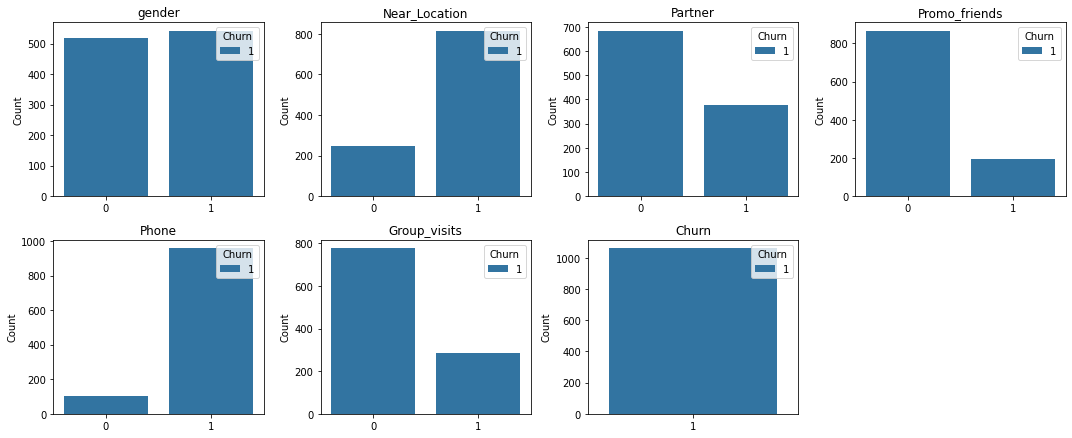

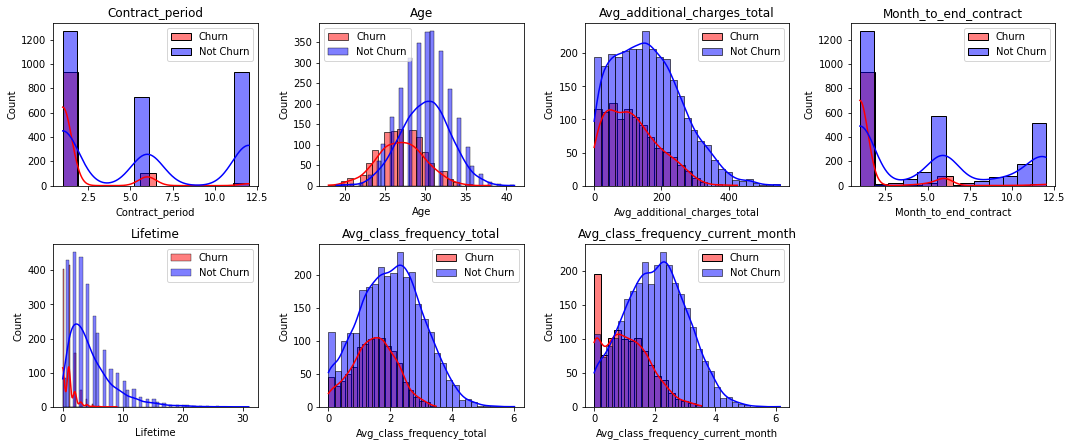

In [7]:
plt.figure(figsize=(15, 12))
plot_number = 1
# Filtrar las columnas binarias y no binarias
binarias = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
no_binarias = [col for col in cancel.columns if col not in binarias]


# Crear gráficos para variables binarias (gráficos de barras)
plt.figure(figsize=(15, 12))
plot_number = 1
for column in binarias:
    plt.subplot(4, 4, plot_number)
    sns.countplot(x=column, data=cancel, hue='Churn')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plot_number += 1

plt.tight_layout()
plt.show()

# Crear gráficos para variables no binarias (histogramas con función de densidad)
plt.figure(figsize=(15, 12))
plot_number = 1
for column in no_binarias:
    plt.subplot(4, 4, plot_number)
    sns.histplot(cancel[column], color='red', label='Churn', kde=True)
    sns.histplot(stay[column], color='blue', label='Not Churn', kde=True)
    plt.title(column)
    plt.legend()
    plot_number += 1

plt.tight_layout()
plt.show()


### Crea una matriz de correlación y muéstrala.

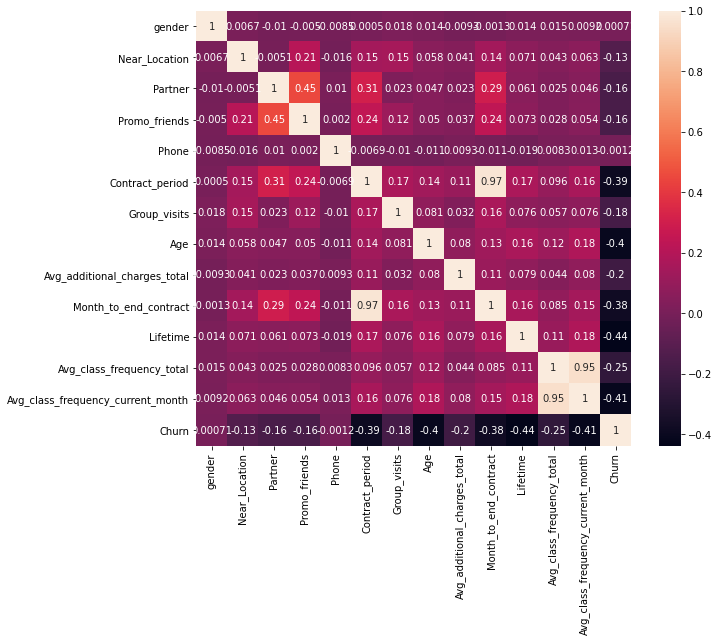

In [8]:
# Construye y representa una matriz de correlación
cm = gym.corr()  # calcula la matriz de correlación

# Incrementa el tamaño del mapa de calor
plt.figure(figsize=(10, 8))  # ajusta el tamaño según tus necesidades

# Trama el mapa de calor anotado para la matriz de correlación
sns.heatmap(cm, annot=True, square=True)

# Corrige los campos "irregulares" del mapa de calor en la última versión de la librería
ax = plt.gca()


plt.show()

hay una gran correlacion en las caracteristicas :
- moth end contract y contract_period
- avg class frequency current month y avg class frequency total

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Buen trabajo.
</div>


## Paso 3. Construir un modelo para predecir la cancelación de usuarios

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [9]:
X=gym.drop(columns=['Churn'])
y=gym['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística; bosque aleatorio.

In [10]:
# Entrenar un modelo de regresión logística
logistic_model = LogisticRegression()  
logistic_model.fit(X_train, y_train)
# Entrenar un modelo de bosque aleatorio
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)  
random_forest_model.fit(X_train, y_train)


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=0)

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [11]:
# Realizar predicciones en los datos de validación
logistic_predictions_val = logistic_model.predict(X_test)
random_forest_predictions_val = random_forest_model.predict(X_test)

# Calcular la exactitud de ambos modelos
logistic_accuracy_val = accuracy_score(y_test, logistic_predictions_val)
random_forest_accuracy_val = accuracy_score(y_test, random_forest_predictions_val)

# Calcular la precisión de ambos modelos
logistic_precision_val = precision_score(y_test, logistic_predictions_val)
random_forest_precision_val = precision_score(y_test, random_forest_predictions_val)

# Calcular el recall de ambos modelos
logistic_recall_val = recall_score(y_test, logistic_predictions_val)
random_forest_recall_val = recall_score(y_test, random_forest_predictions_val)

# Imprimir los resultados
print("Regresión Logística:")
print("Exactitud:", logistic_accuracy_val)
print("Precisión:", logistic_precision_val)
print("Recall:", logistic_recall_val)
print("\nBosque Aleatorio:")
print("Exactitud:", random_forest_accuracy_val)
print("Precisión:", random_forest_precision_val)
print("Recall:", random_forest_recall_val)

Regresión Logística:
Exactitud: 0.9225
Precisión: 0.8823529411764706
Recall: 0.8048780487804879

Bosque Aleatorio:
Exactitud: 0.9175
Precisión: 0.8492462311557789
Recall: 0.824390243902439


el algoritmo que tiene mejores reultados es El bosque aleatorio

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección de modelamiento.
</div>


## Paso 4. Crear clústeres de usuarios/as

### Estandariza los datos.

In [12]:
# la estandarización de datos obligatoria antes de pasarlo al algoritmo
sc = StandardScaler()
X_sc = sc.fit_transform(X)


### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

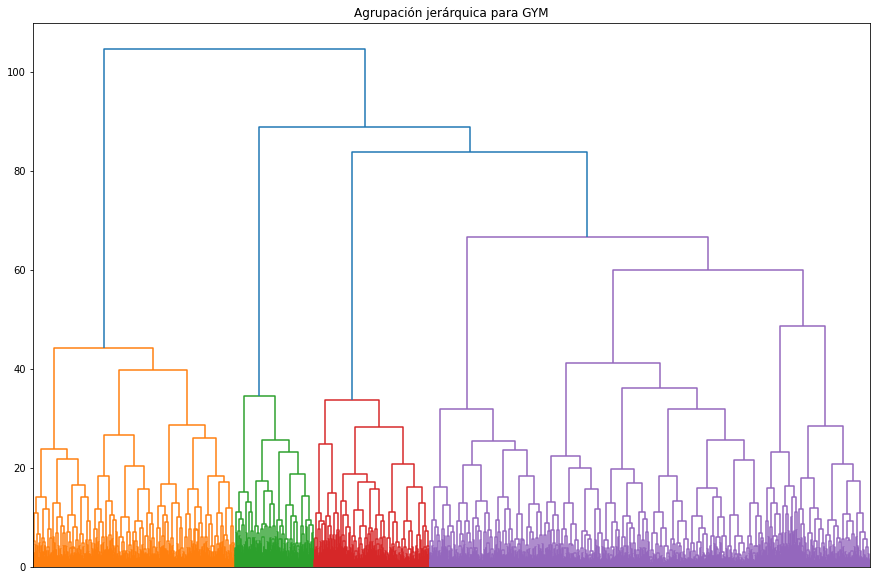

In [13]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.gca().set_xticks([])
plt.title('Agrupación jerárquica para GYM')
plt.show()

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [14]:
# define el modelo k_means con 5 clústeres
kmeans_model = KMeans(n_clusters = 5)
# entrenar el modelo
kmeans_model.fit(X)

KMeans(n_clusters=5)

### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [15]:
# Predecir los clusters para los datos existentes
clusters = kmeans_model.predict(X)
gym['cluster'] = clusters
# Calcular los valores medios de las características para cada cluster
cluster_means = gym.groupby('cluster').mean()

# Imprimir los valores medios de las características para cada cluster
print("Valores medios de características para cada cluster:")
print(cluster_means)

Valores medios de características para cada cluster:
           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.465986       0.853741  0.513605       0.336735  0.928571   
1        0.517275       0.844028  0.459033       0.281343  0.901283   
2        0.506048       0.823589  0.486895       0.297379  0.907258   
3        0.527665       0.875843  0.508772       0.346829  0.900135   
4        0.507292       0.842708  0.490625       0.310417  0.896875   

         Contract_period  Group_visits        Age  \
cluster                                             
0               5.772109      0.435374  29.877551   
1               4.315893      0.417572  28.972359   
2               4.160282      0.379032  28.888105   
3               5.368421      0.426451  29.314440   
4               4.740625      0.422917  29.401042   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
clu

- en la columna Avg_additional_charges_total se observa varios medios bastante alejados entre clusters
- en la columna Churn hay un promedio muy menor en el cluster 3

### Traza distribuciones de características para los clústeres. ¿Notas algo?

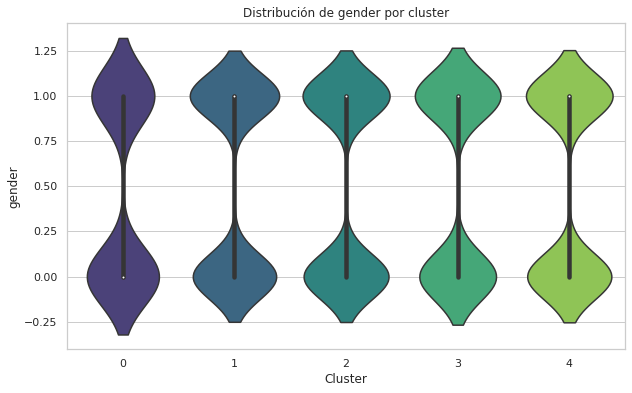

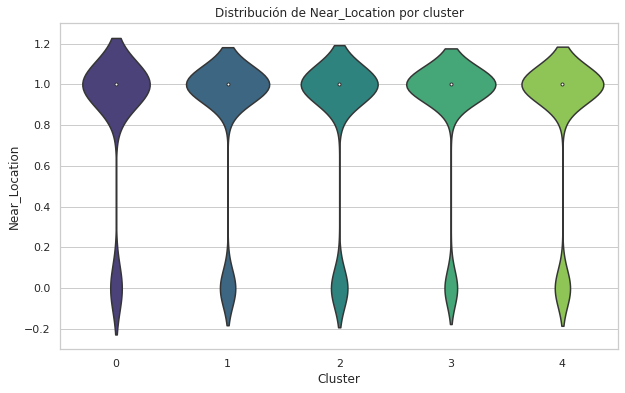

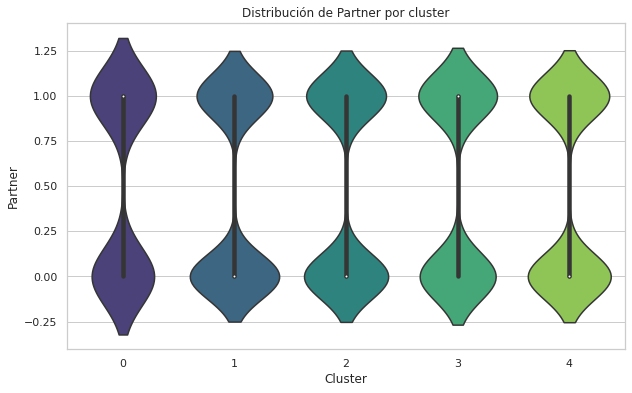

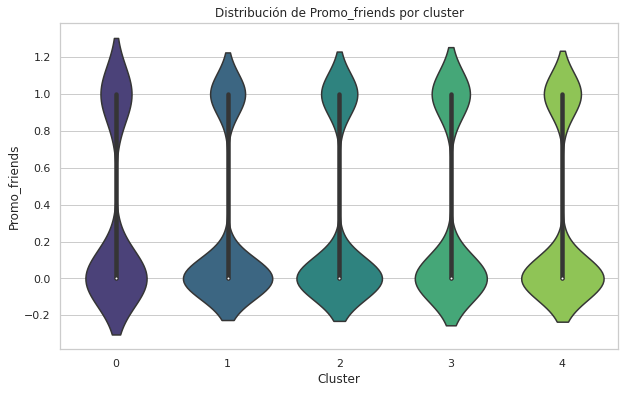

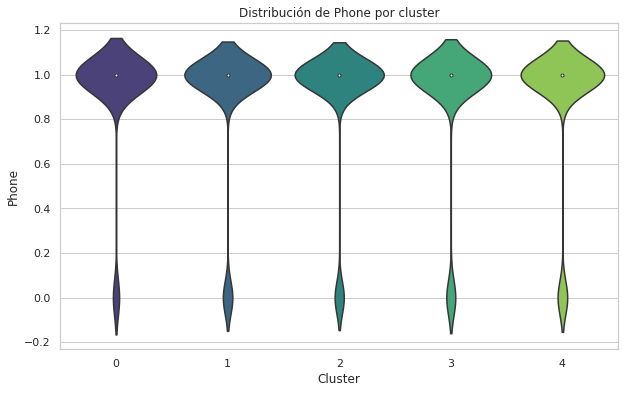

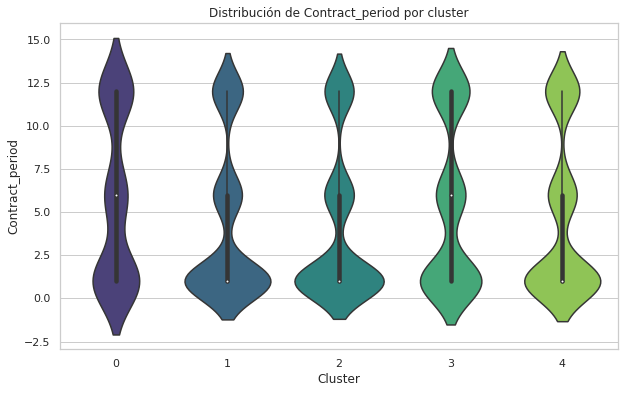

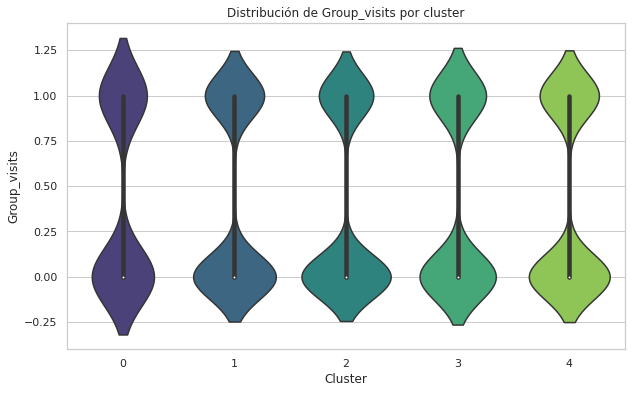

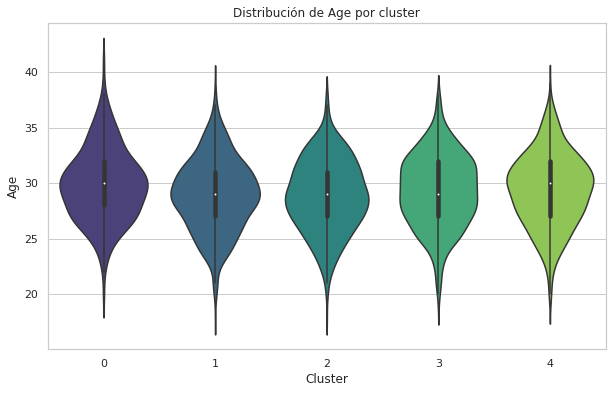

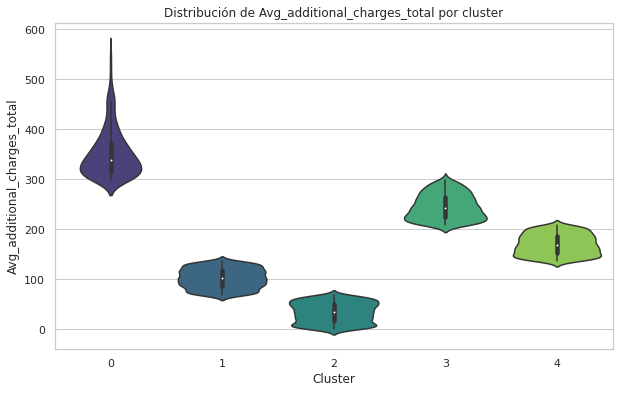

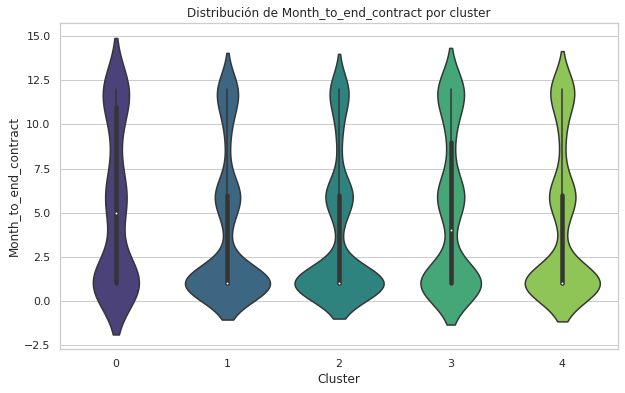

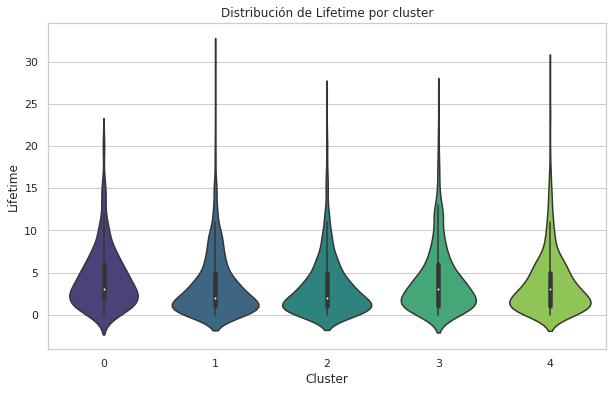

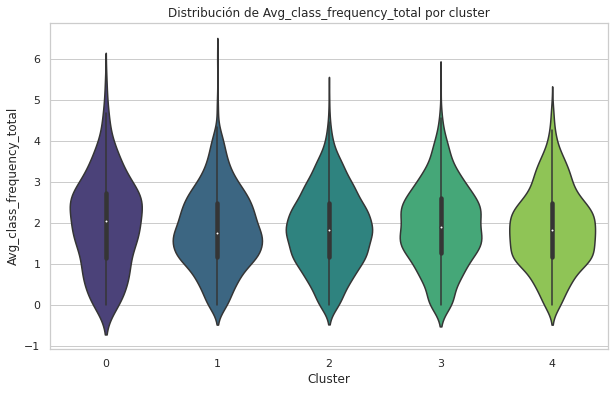

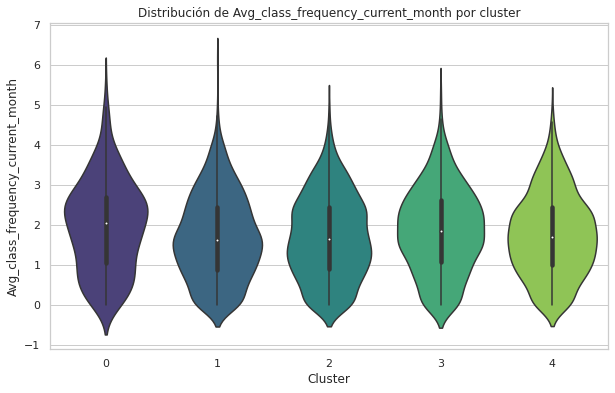

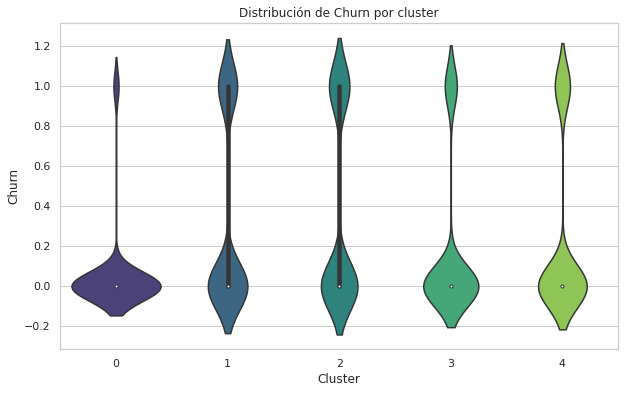

In [16]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Iterar sobre cada característica y trazar su distribución para cada clúster
for feature in gym.columns[:-1]:  # Excluir la columna de clúster
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='cluster', y=feature, data=gym, palette='viridis')
    plt.title(f'Distribución de {feature} por cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

- cluster 0:Mayor proporción de clientes que viven o trabajan cerca del gimnasio.Alta tasa de retención (baja tasa de churn) debido a un alto promedio de tiempo de vida y contrato más largo.Mayor gasto adicional total promedio, lo que sugiere una mayor participación en servicios adicionales del gimnasio.
- cluster 1:Menor proporción de clientes que se inscribieron a través de promociones de "trae a un amigo".Contratos más cortos y menor tiempo de vida promedio, lo que sugiere una menor lealtad y compromiso.Baja frecuencia media de visitas tanto en general como en el mes actual.
- cluster 2:Similar a Cluster 1 en términos de compromiso y lealtad. Además, tienen un gasto adicional total promedio más bajo, lo que indica una menor participación en servicios adicionales del gimnasio.
- cluster 3:Mayor proporción de clientes que viven o trabajan cerca del gimnasio. Tienen un gasto adicional total promedio más bajo en comparación con Cluster 0.
- cluster 4: tienen una tasa de churn más alta en comparación con los otros clusters

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [17]:
# Calcular la tasa de cancelación para cada clúster
churn_rates = gym.groupby('cluster')['Churn'].mean()

# Imprimir las tasas de cancelación por clúster
print("Tasas de cancelación por clúster:")
print(churn_rates)

Tasas de cancelación por clúster:
cluster
0    0.054422
1    0.324778
2    0.357863
3    0.179487
4    0.237500
Name: Churn, dtype: float64


vemos mas tasas de cancelacion en los clusters 1 y 2 , y menos en el cluster 3

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

como vimos debemos seguir el ejemplo del cluster 3 donde se obtuvo menos tasas de cancelacion con respecto a los otros clusters, para esto vendrian bien las siguientes recomendaciones:
- Personalización de la Experiencia: 
Implementar programas de membresía flexibles que se ajusten a las necesidades individuales de los clientes.
Utilizar datos de clientes para ofrecer recomendaciones personalizadas de entrenamiento.
- Enfoque en la Retención a Largo Plazo:
Ofrecer incentivos para los clientes que mantienen una membresía a largo plazo, como en los departamentos de cafetería, productos deportivos, cosméticos, masajes, etc.
Esto debido a que los usuarios del cluster 3 tuvieron mas gastos adicionales.
Implementar un programa de seguimiento proactivo para identificar clientes en riesgo de cancelación y ofrecerles incentivos para que se queden.
- Mejorar la Experiencia del Cliente:
Apuntar a clientes que viven mas cerca porque es mas probable que no cancelen los contratos. Crear nuevas promociones donde se incentive a los usuarios a tener visitas mas frecuentes al gimnasio.
Utilizar tecnología de seguimiento de actividad física para ayudar a los clientes a establecer y alcanzar metas de asistencia personalizadas.
Implementar un programa de fidelización donde los clientes acumulen puntos por cada visita al gimnasio. Estos puntos pueden canjearse por premios, descuentos en servicios adicionales o productos de la tienda del gimnasio.

++


<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Yair. Nos quedan algunos elementos por corregir antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>